In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("Song_features.csv")
data = data.dropna()

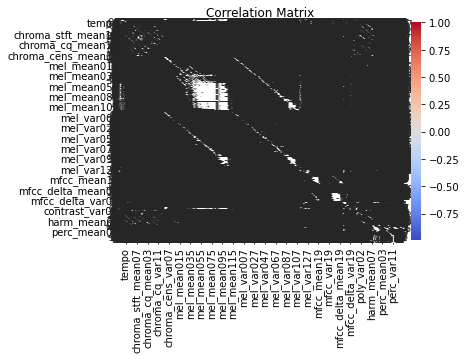

               tempo  duration  rms_mean   rms_var  zcr_mean   zcr_var  \
tempo       1.000000 -0.049028  0.096500  0.000440  0.113518  0.044648   
duration   -0.049028  1.000000 -0.256624 -0.197058 -0.171665 -0.115171   
rms_mean    0.096500 -0.256624  1.000000  0.415332  0.180749 -0.064157   
rms_var     0.000440 -0.197058  0.415332  1.000000 -0.047257  0.187720   
zcr_mean    0.113518 -0.171665  0.180749 -0.047257  1.000000  0.552824   
...              ...       ...       ...       ...       ...       ...   
perc_var08 -0.011908 -0.058146 -0.076631  0.098195 -0.100123  0.090118   
perc_var09 -0.014148 -0.090484  0.011258  0.122281  0.083045  0.191375   
perc_var10 -0.033353 -0.090571 -0.087653  0.090821 -0.081254  0.130423   
perc_var11  0.011650 -0.064143 -0.123534  0.061365  0.016849  0.267701   
perc_var12 -0.080400 -0.035651 -0.166350  0.051061 -0.009689  0.195393   

            cent_mean  cent_var  spec_bw_mean  spec_bw_var  ...  perc_var03  \
tempo        0.124720  0.002066 

In [20]:
corr_matrix = data.corr()

# Display the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Print the correlation matrix
print(corr_matrix)

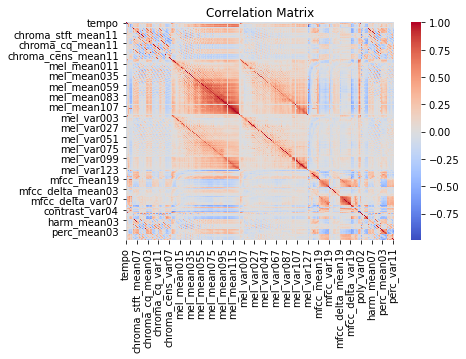

In [24]:
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings("ignore")

def rec(file_name):
    # Load and clean data
    data = pd.read_csv('Song_features.csv')
    data = data.dropna()

    # Extract features (assuming 'song_name' is the only non-feature column)
    feature_data = data.loc[:, 'tempo':]
    
    # Normalize features
    scaler = StandardScaler()
    std_data = scaler.fit_transform(feature_data)

    # Feature selection: remove low-variance features
    selector = VarianceThreshold(threshold=0.01)
    selected_data = selector.fit_transform(std_data)

    # KMeans Clustering
    kmeans = KMeans(n_clusters=30, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km_labels = kmeans.fit_predict(selected_data)

    # Create cluster map
    cluster_map = pd.DataFrame({
        'song_name': data['song_name'],
        'cluster': km_labels
    })

    # Find cluster of the input song
    input_cluster = cluster_map[cluster_map.song_name == file_name].cluster.values[0]

    # Get songs in the same cluster (excluding the input song)
    same_cluster_songs = cluster_map[(cluster_map.cluster == input_cluster) & (cluster_map.song_name != file_name)]['song_name']
    rec = data[data.song_name.isin(same_cluster_songs)]

    # Get feature vector of the input song
    input_song = data[data.song_name == file_name].iloc[0]

    # Compute distance to other songs in the cluster
    distance = []
    for _, row in rec.iterrows():
        d = 0
        for col in feature_data.columns:
            d += abs(float(input_song[col]) - float(row[col]))
        distance.append(d)

    rec['distance'] = distance
    rec = rec.sort_values('distance')

    # Return top 10 recommended songs
    recommendations = rec[['song_name']].head(10).values.tolist()
    return recommendations

print(rec("champagne_problems.mp3"))

[['Ronan__Taylor_s_Version_.mp3'], ['betty.mp3'], ['my_tears_ricochet.mp3'], ['Camouflage.mp3'], ['peace.mp3'], ['That_s_When__feat__Keith_Urban___Taylor_s_Version___From_The_Vault_.mp3'], ['Daylight.mp3'], ['Nothing_New__feat__Phoebe_Bridgers___Taylor_s_Version___From_The_Vault_.mp3'], ['hostage.mp3'], ['Too_Much_To_Ask.mp3']]


In [29]:
print(rec("Ronan__Taylor_s_Version_.mp3"))

[['betty.mp3'], ['champagne_problems.mp3'], ['That_s_When__feat__Keith_Urban___Taylor_s_Version___From_The_Vault_.mp3'], ['Still_Have_Me.mp3'], ['peace.mp3'], ['The_Happiest_Girl.mp3'], ['White_Horse.mp3'], ['Too_Much_To_Ask.mp3'], ['Camouflage.mp3'], ['Don_t_Wanna_Think.mp3']]


In [26]:
def get_songs_by_cluster(cluster_id):
    data = pd.read_csv('Song_features.csv').dropna()

    feature_data = data.loc[:, 'tempo':]
    scaler = StandardScaler()
    std_data = scaler.fit_transform(feature_data)
    selector = VarianceThreshold(threshold=0.01)
    selected_data = selector.fit_transform(std_data)

    kmeans = KMeans(n_clusters=30, init='k-means++', max_iter=300, n_init=10, random_state=0)
    labels = kmeans.fit_predict(selected_data)

    cluster_map = pd.DataFrame({
        'song_name': data['song_name'],
        'cluster': labels
    })

    # Filter by cluster
    songs_in_cluster = cluster_map[cluster_map.cluster == cluster_id]
    return songs_in_cluster['song_name'].tolist()


In [27]:
print(get_songs_by_cluster(5))  # Shows all songs in cluster 5


['Act_My_Age.mp3', 'Alive.mp3', 'American_Idiot.mp3', 'Babylon.mp3', 'Back_For_You.mp3', 'Beside_You.mp3', 'Better_Than_Words.mp3', 'Bigger_Than_Me.mp3', 'Black_Magic.mp3', 'Carolina.mp3', 'Castle_on_the_Hill.mp3', 'Close_As_Strangers.mp3', 'COME_TOGETHER.mp3', 'Diana.mp3', 'Disconnected.mp3', 'Everything_I_Didn_t_Say.mp3', 'FEED.mp3', 'Flatline.mp3', 'Fly_Away.mp3', 'Girls_Talk_Boys_-_From__Ghostbusters__Original_Motion_Picture_Soundtrack.mp3', 'Girl_Almighty.mp3', 'Gonna_Get_Caught.mp3', 'good_4_u.mp3', 'Good_Girls.mp3', 'Gotta_Get_Out.mp3', 'Happily.mp3', 'Heart_Attack.mp3', 'Hey_Everybody_.mp3', 'Irresistible.mp3', 'I_Promise_You.mp3', 'I_Won_t_Apologize.mp3', 'Jet_Black_Heart.mp3', 'Just_Saying.mp3', 'Kiss_You.mp3', 'Last_First_Kiss.mp3', 'Little_Black_Dress.mp3', 'Live_While_We_re_Young.mp3', 'Long_Way_Home.mp3', 'Lost_In_Reality.mp3', 'Loved_You_First.mp3', 'Lucky_Again.mp3', 'Make_You_Believe.mp3', 'Mistake.mp3', 'Money.mp3', 'More.mp3', 'Moving_Along.mp3', 'Never_Been_Hurt.mp3